# Importing Standard Libraries

In [ ]:
# Standard Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

# Importing Data Sets

In [ ]:
# reading csv files

order_payments=pd.read_csv('olist_order_payments_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
customers=pd.read_csv('olist_customers_dataset.csv')
order_items=pd.read_csv('olist_order_items_dataset.csv')

In [ ]:
# grouping the columns

items=order_items.groupby(by=['order_id'])[['order_item_id']].agg('count').reset_index()
order_payment=order_payments.groupby(by=['order_id'])[['payment_value']].agg('sum')

In [ ]:
# merging the datasets and creating master dataframe

df1=customers.merge(orders,on='customer_id')
df2=df1.merge(items,on='order_id')
final_df=df2.merge(order_payment,on='order_id')
final_df.shape

(98665, 14)

# Exploratory Data Analysis

In [ ]:
# checking the datatype

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98665 entries, 0 to 98664
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    98665 non-null  object 
 1   customer_unique_id             98665 non-null  object 
 2   customer_zip_code_prefix       98665 non-null  int64  
 3   customer_city                  98665 non-null  object 
 4   customer_state                 98665 non-null  object 
 5   order_id                       98665 non-null  object 
 6   order_status                   98665 non-null  object 
 7   order_purchase_timestamp       98665 non-null  object 
 8   order_approved_at              98651 non-null  object 
 9   order_delivered_carrier_date   97656 non-null  object 
 10  order_delivered_customer_date  96475 non-null  object 
 11  order_estimated_delivery_date  98665 non-null  object 
 12  order_item_id                  98665 non-null 

In [ ]:
# converting date columns to datetime

date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    final_df[col] = pd.to_datetime(final_df[col], format='%Y-%m-%d %H:%M:%S')
    
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98665 entries, 0 to 98664
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    98665 non-null  object        
 1   customer_unique_id             98665 non-null  object        
 2   customer_zip_code_prefix       98665 non-null  int64         
 3   customer_city                  98665 non-null  object        
 4   customer_state                 98665 non-null  object        
 5   order_id                       98665 non-null  object        
 6   order_status                   98665 non-null  object        
 7   order_purchase_timestamp       98665 non-null  datetime64[ns]
 8   order_approved_at              98651 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97656 non-null  datetime64[ns]
 10  order_delivered_customer_date  96475 non-null  datetime64[ns]
 11  order_estimated

In [ ]:
# preparing new columns for analysis


final_df['delivery_against_estimated'] = (final_df['order_estimated_delivery_date'] - final_df['order_delivered_customer_date']).dt.days
final_df['order_purchase_year'] = final_df.order_purchase_timestamp.apply(lambda x: x.year)
final_df['order_purchase_month'] = final_df.order_purchase_timestamp.apply(lambda x: x.month)
final_df['order_purchase_dayofweek'] = final_df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
final_df['order_purchase_hour'] = final_df.order_purchase_timestamp.apply(lambda x: x.hour)
final_df['order_purchase_day'] = final_df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
final_df['order_purchase_mon'] = final_df.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})



In [ ]:
# Changing the month attribute for correct ordenation

final_df['month_year'] = final_df['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
final_df['month_year'] = final_df['order_purchase_year'].astype(str) + '-' + final_df['month_year'].astype(str)


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96477 entries, 0 to 98664
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_unique_id             96477 non-null  object        
 1   customer_city                  96477 non-null  object        
 2   customer_state                 96477 non-null  object        
 3   order_id                       96477 non-null  object        
 4   order_status                   96477 non-null  object        
 5   order_purchase_timestamp       96477 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96477 non-null  datetime64[ns]
 7   order_item_id                  96477 non-null  int64         
 8   payment_value                  96477 non-null  float64       
 9   delivery_against_estimated     96469 non-null  float64       
 10  order_purchase_year            96477 non-null  int64         
 11  order_purchase_

In [ ]:
final_df.head()

,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,payment_value,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05,1,146.87,10.0,2017,5,1,15,Tue,May,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-02-06,1,335.48,7.0,2018,1,4,20,Fri,Jan,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13,1,157.73,-2.0,2018,5,5,16,Sat,May,2018-05
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10,1,173.30,12.0,2018,3,1,16,Tue,Mar,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-15,1,252.25,5.0,2018,7,6,9,Sun,Jul,2018-07


In [ ]:
# displaying missing value counts and corresponding percentage against total observations

missing_values = final_df.isnull().sum().sort_values(ascending = False)
percentage = round((final_df.isnull().sum()/final_df.isnull().count()*100),2).sort_values(ascending = False)
pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage'])

,Values,Percentage
delivery_against_estimated,8,0.01
month_year,0,0.00
order_item_id,0,0.00
customer_city,0,0.00
customer_state,0,0.00
order_id,0,0.00
order_status,0,0.00
order_purchase_timestamp,0,0.00
order_estimated_delivery_date,0,0.00
payment_value,0,0.00


In [ ]:
# dropping columns which is not required for further analysis

final_df.drop(['customer_id','customer_zip_code_prefix','order_delivered_customer_date',
               'order_delivered_carrier_date','order_approved_at'],axis=1,inplace=True)

KeyError: "['customer_id' 'customer_zip_code_prefix' 'order_delivered_customer_date'\n 'order_delivered_carrier_date' 'order_approved_at'] not found in axis"

In [ ]:
# displaying final shape of data

final_df.shape

(96477, 17)

In [ ]:
# displaying summary statistics of final dataframe

final_df.describe()

,order_item_id,payment_value,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour
count,96477.000000,96477.000000,96469.000000,96477.000000,96477.000000,96477.000000,96477.000000
mean,1.142179,159.856357,10.876385,2017.544347,6.031085,2.756574,14.773221
std,0.538773,218.813144,10.180991,0.503538,3.228394,1.967068,5.328394
min,1.000000,9.590000,-189.000000,2016.000000,1.000000,0.000000,0.000000
25%,1.000000,61.880000,6.000000,2017.000000,3.000000,1.000000,11.000000
50%,1.000000,105.280000,11.000000,2018.000000,6.000000,3.000000,15.000000
75%,1.000000,176.330000,16.000000,2018.000000,8.000000,4.000000,19.000000
max,21.000000,13664.080000,146.000000,2018.000000,12.000000,6.000000,23.000000


In [ ]:
final_df.columns

Index(['customer_unique_id', 'customer_city', 'customer_state', 'order_id',
       'order_status', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'order_item_id', 'payment_value',
       'delivery_against_estimated', 'order_purchase_year',
       'order_purchase_month', 'order_purchase_dayofweek',
       'order_purchase_hour', 'order_purchase_day', 'order_purchase_mon',
       'month_year'],
      dtype='object')

In [ ]:
final_df['order_status'].value_counts()

delivered    96477
Name: order_status, dtype: int64

In [ ]:
# final dataframe with oly delivered items

final_df=final_df[final_df['order_status']=='delivered']

In [ ]:
final_df.shape

(96477, 17)

### Monthly Revenue

In [ ]:
# Monthly Revenue 

df_revenue = final_df.groupby(['month_year'])['payment_value'].sum().reset_index()
df_revenue

,month_year,payment_value
0,2016-10,46566.71
1,2016-12,19.62
2,2017-01,127545.67
3,2017-02,271298.65
4,2017-03,414369.39
5,2017-04,390952.18
6,2017-05,567066.73
7,2017-06,490225.60
8,2017-07,566403.93
9,2017-08,646000.61


In [ ]:
# excluding incomplete data from the year 2016

final_df = final_df.query("month_year != '2016-12' and month_year != '2016-10'")

In [ ]:
# Monthly Revenue 

df_revenue = final_df.groupby(['month_year'])['payment_value'].sum().reset_index()
df_revenue.head(5)

,month_year,payment_value
0,2017-01,127545.67
1,2017-02,271298.65
2,2017-03,414369.39
3,2017-04,390952.18
4,2017-05,567066.73


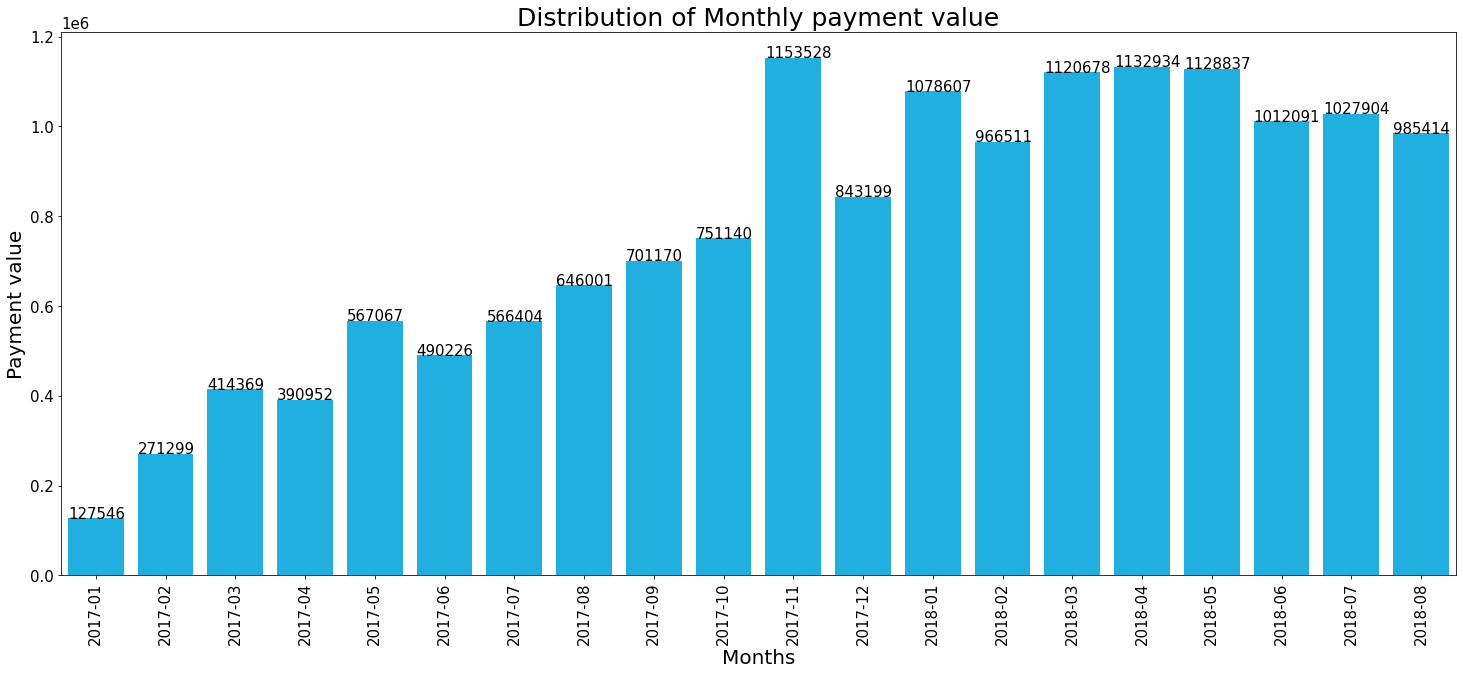

In [ ]:
# plotting the monthly revenue 

plt.figure(figsize=(25,10))

params = {'xtick.labelsize': 15,
          'ytick.labelsize': 15 }
plt.rcParams.update(params)


ax = sns.barplot(x="month_year",y='payment_value' ,data=df_revenue,color='deepskyblue')
ax.set_title('Distribution of Monthly payment value',fontsize=25)
ax.set_xlabel("Months",fontsize=20)
ax.set_ylabel("Payment value",fontsize=20)
plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x(), p.get_height()),size=15)

In [ ]:
#calculating for monthly revenue growth rate 
# using pct_change() function to see monthly percentage change

df_revenue['MonthlyGrowth'] = df_revenue['payment_value'].pct_change()
df_revenue.head(5)

,month_year,payment_value,MonthlyGrowth
0,2017-01,127545.67,NaN
1,2017-02,271298.65,1.127071
2,2017-03,414369.39,0.527355
3,2017-04,390952.18,-0.056513
4,2017-05,567066.73,0.450476


### Monthly customer count

In [ ]:
#creating monthly active customers dataframe by counting unique Customer IDs

df_monthly_active = final_df.groupby('month_year')['customer_unique_id'].nunique().reset_index()
df_monthly_active.head()

,month_year,customer_unique_id
0,2017-01,718
1,2017-02,1630
2,2017-03,2508
3,2017-04,2274
4,2017-05,3479


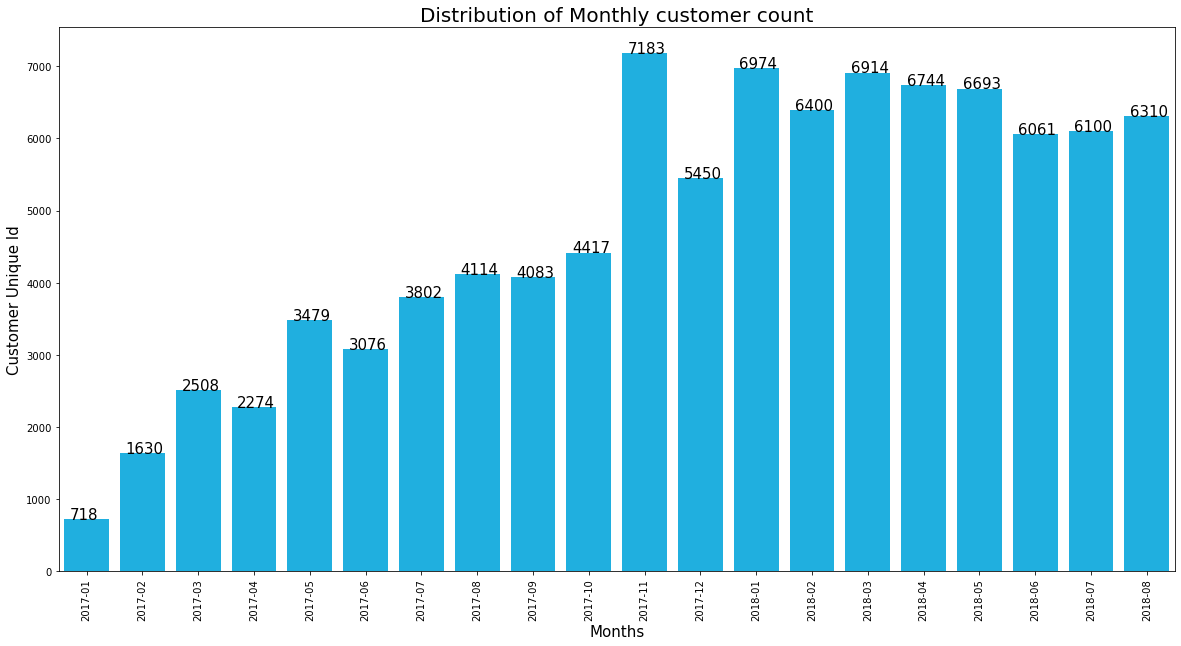

In [ ]:
# plotting the monthly active customers

plt.figure(figsize=(20,10))

params = {'xtick.labelsize': 10,
          'ytick.labelsize': 10 }
plt.rcParams.update(params)

ax = sns.barplot(x="month_year",y='customer_unique_id' ,data=df_monthly_active,color='deepskyblue')
ax.set_title('Distribution of Monthly customer count',fontsize=20)
plt.xticks(rotation=90)
ax.set_xlabel("Months",fontsize=15)
ax.set_ylabel("Customer Unique Id",fontsize=15)


for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),size=15)

### Monthly order count

In [ ]:
#creating monthly active customers dataframe by counting unique Customer IDs

df_monthly_sales = final_df.groupby('month_year')['order_status'].count().reset_index()
df_monthly_sales.head(5)

,month_year,order_status
0,2017-01,750
1,2017-02,1653
2,2017-03,2546
3,2017-04,2303
4,2017-05,3546


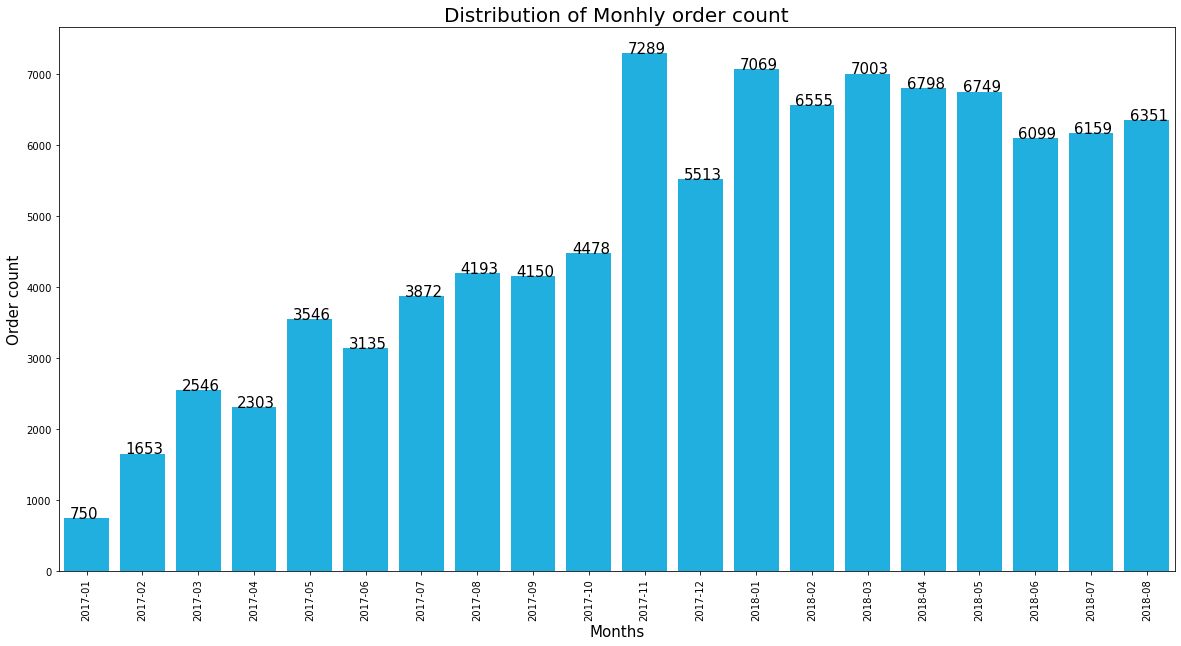

In [ ]:
# plotting monthly order count

plt.figure(figsize=(20,10))
params = {'xtick.labelsize': 10,
          'ytick.labelsize': 10 }
plt.rcParams.update(params)

ax = sns.barplot(x="month_year",y='order_status' ,data=df_monthly_sales,color='deepskyblue')
ax.set_title('Distribution of Monhly order count',fontsize=20)
ax.set_ylabel('Order count',fontsize=15)
ax.set_xlabel('Months',fontsize=15)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),size=15)

# RFM Analysis

### Recency Calculation

In [ ]:
# last purchase date 

final_df['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [ ]:
final_df['order_purchase_timestamp'].min()

Timestamp('2017-01-05 11:56:06')

In [ ]:
last_date=dt.date(2018,8,30)
print(last_date)

2018-08-30


In [ ]:
# creating a new column having date of purchase

final_df['Date']=final_df['order_purchase_timestamp'].dt.date

In [ ]:
# grouping customers based on last purchase date

recency_df=final_df.groupby(by='customer_unique_id',as_index=False)['Date'].max()
recency_df.columns=['Customer_unique_id','LastPurchaseDate']
recency_df.head()

,Customer_unique_id,LastPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07
2,0000f46a3911fa3c0805444483337064,2017-03-10
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14


In [ ]:
# Recency calculation

recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (last_date - x).days)
recency_df.head()

,Customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,115
2,0000f46a3911fa3c0805444483337064,2017-03-10,538
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,322
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,289


In [ ]:
#dropping LastPurchaseDate from the dataframe since it is not required for further analysis

recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

In [ ]:
recency_df.head()

,Customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115
2,0000f46a3911fa3c0805444483337064,538
3,0000f6ccb0745a6a4b88665a16c9f078,322
4,0004aac84e0df4da2b147fca70cf8255,289


In [ ]:
recency_df['Customer_unique_id'].nunique()

93104

In [ ]:
recency_df.describe()

,Recency
count,93104.000000
mean,237.240086
std,150.946046
min,1.000000
25%,115.000000
50%,219.000000
75%,346.000000
max,602.000000


### Frequency Calculation

In [ ]:
# frequency calculation using customer id and order id

frequency_df = final_df.groupby(by=['customer_unique_id']).order_id.count().reset_index()
frequency_df.columns = ['Customer_unique_id','Frequency']

In [ ]:
frequency_df.head()

,Customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [ ]:
frequency_df['Customer_unique_id'].nunique()

93104

In [ ]:
frequency_df.describe()

,Frequency
count,93104.000000
mean,1.033371
std,0.209012
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [ ]:
frequency_df['Frequency'].value_counts()

1     90315
2      2562
3       180
4        28
5         9
6         5
7         3
15        1
9         1
Name: Frequency, dtype: int64

### Monetary Calculation

In [ ]:
# monetary calculation using customer id and payment value

monetary_df = final_df.groupby('customer_unique_id').payment_value.sum().reset_index()
monetary_df.columns = ['Customer_unique_id','Monetary']

In [ ]:
monetary_df.head()

,Customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [ ]:
monetary_df.describe()

,Monetary
count,93104.000000
mean,165.147313
std,226.381578
min,9.590000
25%,63.040000
50%,107.780000
75%,182.495000
max,13664.080000


### RFM Table

In [ ]:
# creating RFM table from the identified values
# merging recency and frequency dataframe

rf_df=recency_df.merge(frequency_df,on='Customer_unique_id')
rf_df.head()

,Customer_unique_id,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1
2,0000f46a3911fa3c0805444483337064,538,1
3,0000f6ccb0745a6a4b88665a16c9f078,322,1
4,0004aac84e0df4da2b147fca70cf8255,289,1


In [ ]:
# merging the rf dataframe with monetary dataframe

rfm_df=rf_df.merge(monetary_df,on='Customer_unique_id')
rfm_df.head()

,Customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,538,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89


In [ ]:
# converting customer_unique_id as index

rfm_df.set_index('Customer_unique_id',inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
Customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89


In [ ]:
# verifying RFM table

final_df[final_df['customer_unique_id']=='0000366f3b9a7992bf8c76cfdf3221e2']

,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,payment_value,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,Date
63518,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-21,1,141.9,4.0,2018,5,3,10,Thu,May,2018-05,2018-05-10


In [ ]:
(last_date - dt.date(2018,5,10)).days == 112

True

As we can see our RFM table is correct. The first customer bought only once and before 112 days

# Customer Segmentation with RFM values

### Applying RFM Score formula

The simplest and effective way is to create customers segments from RFM Model by using Quartiles.  We assign a score from 1 to 5 to Recency, Frequency and Monetary. Five is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated by combining individual RFM score numbers.

### RFM Quartiles

In [ ]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,115.0,1.0,63.040
0.50,219.0,1.0,107.780
0.75,346.0,1.0,182.495


In [ ]:
quantiles.to_dict()

{'Recency': {0.25: 115.0, 0.5: 219.0, 0.75: 346.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 63.04, 0.5: 107.78, 0.75: 182.495}}

### Creation of RFM Segmentation table

Two segmentation of classes will be created since high recency is bad for business while high frequency and monetary value is good.

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]: 
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
# creating rfm segmentation table with the calculated rfm scores

rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles))

In [ ]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
Customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,3
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1
0000f46a3911fa3c0805444483337064,538,1,86.22,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2,1,1
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2,1,4


In [ ]:
# combining rfm scores

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411
0000f46a3911fa3c0805444483337064,538,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2,1,4,214


Best Recency Score = 4 , Best Frequency Score = 4 , Best Monetary Score = 4.

Ordering the customer based on the best score

In [ ]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer_unique_id,,,,,,,
c8460e4251689ba205045f3ea17884a1,22,4,4655.91,4,4,4,444
7b0eaf68a16e4808e5388c67345033c9,103,2,2340.08,4,4,4,444
906a8a4ec9f3d4c3e64fa6d1c4fe6009,41,2,2020.86,4,4,4,444
0341bbd5c969923a0f801b9e2d10a7b8,92,2,1999.68,4,4,4,444
525cda9909aa001ebed396f6e55eae01,23,2,1782.90,4,4,4,444
4facc2e6fbc2bffab2fea92d2b4aa7e4,17,4,1760.75,4,4,4,444
397b44d5bb99eabf54ea9c2b41ebb905,74,4,1756.53,4,4,4,444
87c9e7ba960e4c2e6bd786b162adc639,109,2,1653.98,4,4,4,444
fe81bb32c243a86b2f86fbf053fe6140,70,5,1590.76,4,4,4,444


**Segmenting customer into 6 different categories based on the calculated RFM scores**

In [ ]:
rfm_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93104 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recency     93104 non-null  int64  
 1   Frequency   93104 non-null  int64  
 2   Monetary    93104 non-null  float64
 3   R_Quartile  93104 non-null  int64  
 4   F_Quartile  93104 non-null  int64  
 5   M_Quartile  93104 non-null  int64  
 6   RFMScore    93104 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 5.7+ MB


In [ ]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  522
Loyal Customers:  2789
Big Spenders:  23276
Almost Lost:  415
Lost Customers:  341
Lost Cheap Customers:  5916


# Applying K_means clustering on RFM variables

In [ ]:
# data preprocessing

rfm_data = rfm_df.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore'],axis=1)
rfm_data.head()

NameError: ignored

**Visualizing feature distributions**

In [ ]:
# pair plot

sns.pairplot(rfm_data,diag_kind='kde')
plt.show()

NameError: ignored

In [ ]:
# correlation plot

sns.heatmap(rfm_data.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
# Scaling input using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(rfm_data), columns=rfm_data.columns,index=rfm_data.index)

In [ ]:
sns.pairplot(X)
plt.show()

There exists only few outliers but in business point of view thosw customers may be required for further analysis. Hence carryouting the analysis with those customers

In [ ]:
sns.heatmap(X.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

wcss = [] #inertia (within cluster sum square) or total spread

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.figure(figsize=(15,8))
plt.plot(range(1,10), wcss, color='red',marker='o')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [ ]:
# initializing cluster value
k=4

In [ ]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=k,n_init=15,random_state=2)
km.fit(X)

In [ ]:
# Review output cluster labels
cluster_labels = km.labels_
print("Assigned cluster labels: \n", cluster_labels)

In [ ]:
# Review Centroids of clusters
centroids = km.cluster_centers_
print("Location of centroids: ")
print(centroids)

In [ ]:
# silhouttescore and inertia

from sklearn import metrics
metrics.silhouette_score(X, cluster_labels, metric='euclidean')

In [ ]:
# Plotting Silhouette Score
from scikitplot.metrics import plot_silhouette
plot_silhouette(X, cluster_labels);

In [ ]:
# Append clusters to input features table
X['clusters'] = cluster_labels
X.head()

In [ ]:
X['clusters'].value_counts()

In [ ]:
sns.countplot(X['clusters'])
plt.title("Cluster count")
plt.show()

In [ ]:
sns.pairplot(X,hue='clusters')
plt.show()

In [ ]:
X.boxplot(by = 'clusters',layout=(2,4), figsize=(30, 15))
plt.show()

In [ ]:
# combining dataset to analyse the cluters

data=X.reset_index()
data.head()

In [ ]:
data.rename(columns={'Customer_unique_id':'customer_unique_id'},inplace=True)

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
df_full=data.merge(final_df,how='left',on='customer_unique_id')

In [ ]:
df_full.info()

In [ ]:
df_full.shape

In [ ]:
df_full.isna().sum()

In [ ]:
df_full.duplicated().sum()